In [ ]:
%pip install pyspark
%pip install findspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import findspark
findspark.init()

In [ ]:
import pandas as pd
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, sum, col
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import avg,col,desc
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.classification import LogisticRegression
from sklearn.metrics import accuracy_score
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.classification import LinearSVC
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.sql.functions import expr

In [ ]:
sc = SparkContext()

# Creating a spark session
spark = SparkSession \
    .builder \
    .appName("Python Spark DataFrames basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [ ]:
spark

## Data Cleaning

In [ ]:
df = pd.read_csv('egphotelbookings.csv')

In [ ]:
df.dtypes

Unnamed: 0                          int64
hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [ ]:
df.isnull().sum()

Unnamed: 0                             0
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
df.columns

Index(['Unnamed: 0', 'hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'agent', 'company', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [ ]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of         Unnamed: 0              hotel  is_canceled  lead_time  \
0                0  Renaissance Hotel            0        342   
1                1  Renaissance Hotel            0        737   
2                2  Renaissance Hotel            0          7   
3                3  Renaissance Hotel            0         13   
4                4  Renaissance Hotel            0         14   
...            ...                ...          ...        ...   
119385      119385  JW Marriott Hotel            0         23   
119386      119386  JW Marriott Hotel            0        102   
119387      119387  JW Marriott Hotel            0         34   
119388      119388  JW Marriott Hotel            0        109   
119389      119389  JW Marriott Hotel            0        205   

        arrival_date_year arrival_date_month  arrival_date_week_number  \
0                    2018               July                        27   
1                    2018   

In [ ]:
df=df.fillna(df['country'].mode())

In [ ]:
df=df.fillna(df.mode().iloc[0])

In [ ]:
df=df.fillna(df.mean())

<ipython-input-13-6f8c6f28e805>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df=df.fillna(df.mean())


In [ ]:
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'ETH', 

In [ ]:
df.isnull().sum()

Unnamed: 0                        0
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

### Data Preprocessing

In [ ]:
df['agent'].unique()

array([  9., 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146., 177.,   6., 143., 244., 149., 167., 300.,
       171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,  29.,
       258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208., 256.,
       314., 126., 281., 273., 253., 185., 330., 334., 328., 326., 321.,
       324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348., 310.,
       339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257., 393.,
       168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1., 201.,
       183., 223., 368., 336., 291., 464., 411., 481.,  10., 154., 468.,
       410., 390., 440., 495., 492., 493., 434.,  57., 531., 420., 483.,
       526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,  47.,
       114., 301., 193., 182., 135., 350., 195., 352., 355., 159., 363.,
       384., 360., 331., 367.,  64., 406., 163., 41

In [ ]:
sdf = spark.createDataFrame(df) 
sdf.printSchema()
sdf.createTempView("hotels")

root
 |-- Unnamed: 0: long (nullable = true)
 |-- hotel: string (nullable = true)
 |-- is_canceled: long (nullable = true)
 |-- lead_time: long (nullable = true)
 |-- arrival_date_year: long (nullable = true)
 |-- arrival_date_month: string (nullable = true)
 |-- arrival_date_week_number: long (nullable = true)
 |-- arrival_date_day_of_month: long (nullable = true)
 |-- stays_in_weekend_nights: long (nullable = true)
 |-- stays_in_week_nights: long (nullable = true)
 |-- adults: long (nullable = true)
 |-- children: double (nullable = true)
 |-- babies: long (nullable = true)
 |-- meal: string (nullable = true)
 |-- country: string (nullable = true)
 |-- distribution_channel: string (nullable = true)
 |-- is_repeated_guest: long (nullable = true)
 |-- previous_cancellations: long (nullable = true)
 |-- previous_bookings_not_canceled: long (nullable = true)
 |-- reserved_room_type: string (nullable = true)
 |-- assigned_room_type: string (nullable = true)
 |-- booking_changes: long (nul

In [ ]:
sdf.show(20)

+----------+-----------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+-------------+------+---------------------------+-------------------------+
|Unnamed: 0|            hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_list|customer_type|   adr|required_car_parking_spaces|total_of_special_requests|
+----------+----

<ipython-input-19-d42a8ff94858>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


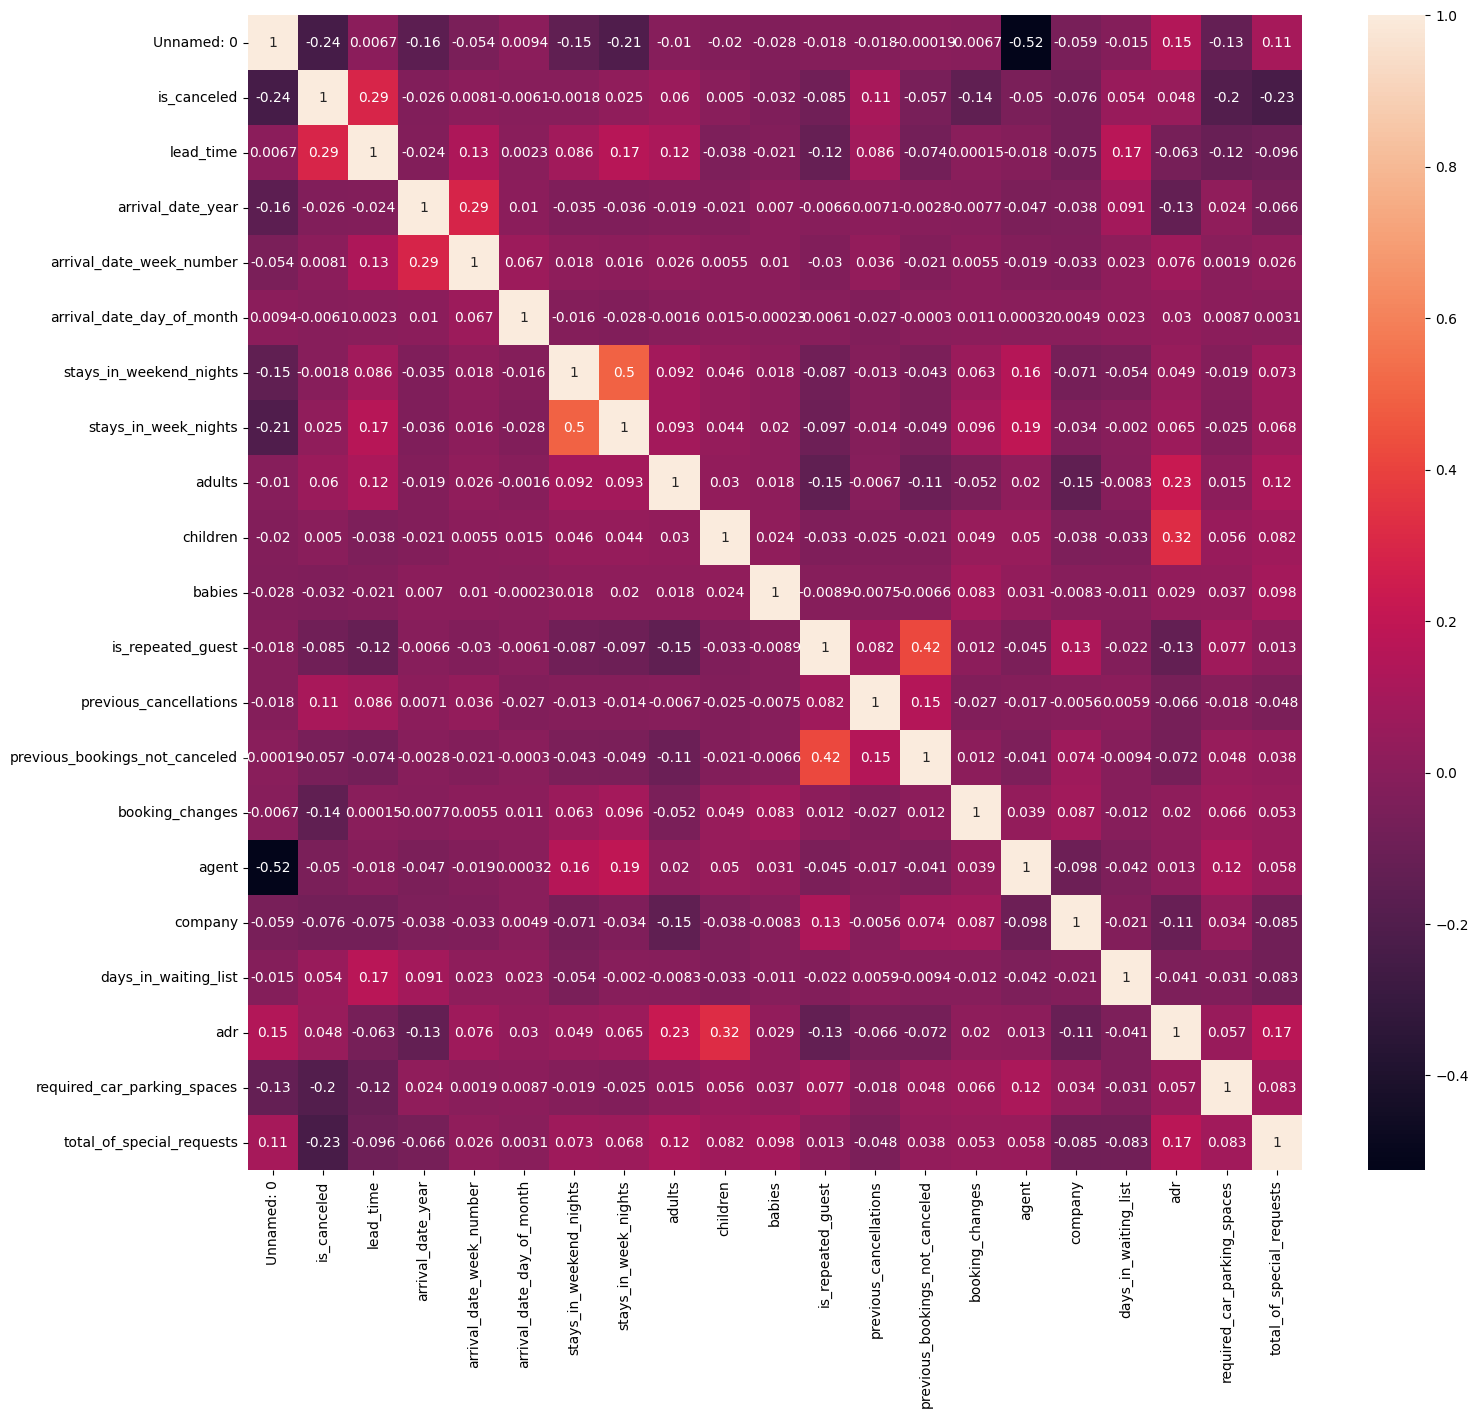

In [ ]:

corr_matrix = df.corr()
plt.figure(figsize=(17, 15))  
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
df.columns

Index(['Unnamed: 0', 'hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'agent', 'company', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

### Insight 1

In [ ]:
import plotly.express as px
hist = px.histogram(df,x='hotel',color='is_canceled',barmode='group')
hist.show()

The graph above can help us infer that even though the total booking for JW Marriot hotel is almost the double of Renaissance hotel, due to the high cancellation in JW marriot the total booking that actually proceed and are not cancelled are 13 126 in comparaison to Renaissance with 17 816 booking not cancelled.

In [ ]:
dfRenaissance=sdf.filter(sdf['hotel']=="Renaissance Hotel")
dfJW=sdf.filter(sdf['hotel']=="JW Marriott Hotel")

In [ ]:
# Total_Cancels_Per_Hotel = sdf.groupby(['hotel'])\
# .agg({"is_canceled": "count"})\
# .sort("count(is_canceled)", ascending=False)\

# Total_Cancels_Per_Hotel.show(20)

+-----------------+------------------+
|            hotel|count(is_canceled)|
+-----------------+------------------+
|JW Marriott Hotel|             79330|
|Renaissance Hotel|             40060|
+-----------------+------------------+



### Insight 2:

In [ ]:
customertype_cancellation = spark.sql("""
    select 
        customer_type,
        sum(is_canceled)
    from hotels
    group by customer_type
    order by sum(is_canceled) 
""")

customertype_cancellation.show()

+---------------+----------------+
|  customer_type|sum(is_canceled)|
+---------------+----------------+
|          Group|              59|
|       Contract|            1262|
|Transient-Party|            6389|
|      Transient|           36514|
+---------------+----------------+



In [ ]:
import plotly.express as px
fig = px.bar(customertype_cancellation.toPandas(), x='customer_type', y='sum(is_canceled)', title='Cancellation Count by Customer Type')
fig.show()


The query above can help us understand more about the cancellation as we can see the transient type of customer has the highest rate of cancelleation and the group has the least amount of cancellation, thus we can think that maybe we can make the transient pay a deposit, or make a sale for this type of customer.




1.   **PROMOTION PROPOSED:**
We ask transient customer for a deposit that is none refundable.
2.  **PROMOTION PROPOSED:**
Assuming that transient spends a day use or max 1 night at the hotel we can offer the customer the meals of the day for free (he/she will still pays the stay in full price however without the meals)



In [ ]:
# cancellationsPerHotel = sdf.groupby(['hotel']) \
#     .agg({"is_canceled": "count"}) \
#     .withColumnRenamed("count(is_canceled)", "total_bookings")

# # Calculate the percentage of cancellations
# cancellationsPerHotel = cancellationsPerHotel.withColumn(
#     "cancellation_percentage",
#     (col("total_bookings") / sdf.count()) * 100
# )

# # Sort by cancellation count in descending order
# cancellationsPerHotel = cancellationsPerHotel.sort(col("total_bookings").desc())

# # Show the result
# cancellationsPerHotel.show()

In [ ]:
total_bookings_per_hotel = sdf.groupBy('hotel').count()
total_cancellations_per_hotel = sdf.filter(sdf['is_canceled'] == 1).groupBy('hotel').count()
total_cancellations_per_hotel.show()
total_not_cancellations_per_hotel = sdf.filter(sdf['is_canceled'] == 0).groupBy('hotel').count()
total_not_cancellations_per_hotel.show()
sum_bookings_per_hotel = sdf.groupBy('hotel').count()
sum_bookings_per_hotel.show()
cancelationPercentage_JW=(33102/79330)*100
cancelationPercentage_renaissance=(11122/40060)*100

print("the percentage of cancelation in JW Marriot is ",cancelationPercentage_JW,"%")
print("the percentage of cancelation in Renaissance is ",cancelationPercentage_renaissance,"%")

+-----------------+-----+
|            hotel|count|
+-----------------+-----+
|Renaissance Hotel|11122|
|JW Marriott Hotel|33102|
+-----------------+-----+

+-----------------+-----+
|            hotel|count|
+-----------------+-----+
|Renaissance Hotel|28938|
|JW Marriott Hotel|46228|
+-----------------+-----+

+-----------------+-----+
|            hotel|count|
+-----------------+-----+
|Renaissance Hotel|40060|
|JW Marriott Hotel|79330|
+-----------------+-----+

the percentage of cancelation in JW Marriot is  41.72696331778646 %
the percentage of cancelation in Renaissance is  27.763354967548675 %


In [ ]:
from pyspark.sql.functions import col, sum

cancellationsPerHotel = sdf.groupby(['hotel']) \
    .agg({"Unnamed: 0": "count"}) \
    .withColumnRenamed("count(Unnamed: 0)", "total_bookings")


canceleddf = sdf.filter(sdf['is_canceled'] == 1)

# Calculate the cancellation percentage
cancellationPercentage = canceleddf.groupby('hotel') \
    .count() \
    .withColumnRenamed("count", "cancelled_bookings")

cancellationsPerHotel = cancellationsPerHotel.join(
    cancellationPercentage,
    on='hotel'
)

cancellationsPerHotel = cancellationsPerHotel.withColumn(
    "cancellation_percentage",
    (col("cancelled_bookings") / col("total_bookings")) * 100
)

# Sort by cancellation count in descending order
cancellationsPerHotel = cancellationsPerHotel.sort(col("total_bookings").desc())

# Show the result
cancellationsPerHotel.show()


+-----------------+--------------+------------------+-----------------------+
|            hotel|total_bookings|cancelled_bookings|cancellation_percentage|
+-----------------+--------------+------------------+-----------------------+
|JW Marriott Hotel|         79330|             33102|      41.72696331778646|
|Renaissance Hotel|         40060|             11122|     27.763354967548675|
+-----------------+--------------+------------------+-----------------------+



In [ ]:
dfRenaissance.groupby(['arrival_date_month'])\
.agg({"arrival_date_month": "COUNT"})\
.sort(col("count(arrival_date_month)").desc())\
.show()

+------------------+-------------------------+
|arrival_date_month|count(arrival_date_month)|
+------------------+-------------------------+
|            August|                     4894|
|              July|                     4573|
|             April|                     3609|
|               May|                     3559|
|           October|                     3555|
|             March|                     3336|
|         September|                     3108|
|          February|                     3103|
|              June|                     3045|
|          December|                     2648|
|          November|                     2437|
|           January|                     2193|
+------------------+-------------------------+



In [ ]:
dfJW.groupby(['arrival_date_month'])\
.agg({"arrival_date_month": "COUNT"})\
.sort(col("count(arrival_date_month)").desc())\
.show()

+------------------+-------------------------+
|arrival_date_month|count(arrival_date_month)|
+------------------+-------------------------+
|            August|                     8983|
|               May|                     8232|
|              July|                     8088|
|              June|                     7894|
|           October|                     7605|
|             April|                     7480|
|         September|                     7400|
|             March|                     6458|
|          February|                     4965|
|          November|                     4357|
|          December|                     4132|
|           January|                     3736|
+------------------+-------------------------+



In [ ]:
data_guests = df[df['is_canceled']==0]
data_guests = data_guests[['arrival_date_month','hotel']]
renaissance = data_guests[data_guests['hotel']=='Renaissance Hotel']
r_guests = renaissance['arrival_date_month'].value_counts().reset_index()
r_guests.columns=['arrival_date_month','no_of_guests']
r_guests

# this is an alternative code cause sometimes the code aboves gives an unexplained error 
# from pyspark.sql.functions import col

# data_guests = df.filter(df['is_canceled'] == 0)
# data_guests = data_guests.select('arrival_date_month', 'hotel')
# renaissance = data_guests.filter(data_guests['hotel'] == 'Renaissance Hotel')
# r_guests = renaissance.groupby('arrival_date_month').count()
# r_guests = r_guests.withColumnRenamed('count', 'no_of_guests')

# r_guests.show()

,arrival_date_month,no_of_guests
0,August,3257
1,July,3137
2,October,2577
3,March,2573
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2038
9,December,2017


In [ ]:
data_guests = df[df['is_canceled']==0]
data_guests = data_guests[['arrival_date_month','hotel']]
renaissance = data_guests[data_guests['hotel']=='JW Marriott Hotel']
JW_guests = renaissance['arrival_date_month'].value_counts().reset_index()
JW_guests.columns=['arrival_date_month','no_of_guests']
JW_guests

# this is an alternative code cause sometimes the code aboves gives an unexplained error 
# data_guests = df.filter(df['is_canceled'] == 0)
# data_guests = data_guests.select('arrival_date_month', 'hotel')
# jw = data_guests.filter(data_guests['hotel'] == 'JW Marriott Hotel')
# jw_guests = jw.groupby('arrival_date_month').count()
# jw_guests = jw_guests.withColumnRenamed('count', 'no_of_guests')

# jw_guests.show()

,arrival_date_month,no_of_guests
0,August,5381
1,July,4782
2,May,4579
3,June,4366
4,October,4337
5,September,4290
6,March,4072
7,April,4015
8,February,3064
9,November,2696


In [ ]:
bookings_per_month = sdf.groupBy('arrival_date_month').agg(count('*').alias('bookings'))
cancels=sdf.filter(sdf.is_canceled == 1)
cancellations_per_month =cancels.groupBy('arrival_date_month').agg(count('*').alias('cancellations'))

result = bookings_per_month.join(cancellations_per_month, on='arrival_date_month')
result = result.withColumn('cancellation_percentage', (result.cancellations / result.bookings) * 100)
result=result.sort("cancellation_percentage", ascending=False)

result.show()

+------------------+--------+-------------+-----------------------+
|arrival_date_month|bookings|cancellations|cancellation_percentage|
+------------------+--------+-------------+-----------------------+
|              June|   10939|         4535|      41.45717158789652|
|             April|   11089|         4524|      40.79718640093787|
|               May|   11791|         4677|      39.66584683232974|
|         September|   10508|         4116|      39.17015607156452|
|           October|   11160|         4246|      38.04659498207885|
|            August|   13877|         5239|     37.753116667867694|
|              July|   12661|         4742|     37.453597662111996|
|          December|    6780|         2371|      34.97050147492625|
|          February|    8068|         2696|      33.41596430342092|
|             March|    9794|         3149|      32.15233816622422|
|          November|    6794|         2122|     31.233441271710333|
|           January|    5929|         1807|     

the table above showes that june has the highest percentage of cancellation. And january has the lowest.

In [ ]:
book_counts = sdf.groupby(['arrival_date_month'])\
.agg({"arrival_date_month": "count"})\
.sort("count(arrival_date_month)", ascending=False)\
.show()

+------------------+-------------------------+
|arrival_date_month|count(arrival_date_month)|
+------------------+-------------------------+
|            August|                    13877|
|              July|                    12661|
|               May|                    11791|
|           October|                    11160|
|             April|                    11089|
|              June|                    10939|
|         September|                    10508|
|             March|                     9794|
|          February|                     8068|
|          November|                     6794|
|          December|                     6780|
|           January|                     5929|
+------------------+-------------------------+



In [ ]:

# JW Marriot cancellations per month

bookings_per_month = dfJW.groupBy('arrival_date_month').count().withColumnRenamed('count', 'Bookings')
cancels=dfJW.filter(col('is_canceled') == 1)
cancellations_per_month = cancels.groupBy('arrival_date_month').count().withColumnRenamed('count', 'Cancellations')

result = bookings_per_month.join(cancellations_per_month, on='arrival_date_month')
result = result.withColumn('Cancellation_Percentage', (result['Cancellations'] / result['Bookings']) * 100)
result=result.sort('Cancellation_Percentage',ascending = [False])

result.show()


+------------------+--------+-------------+-----------------------+
|arrival_date_month|Bookings|Cancellations|Cancellation_Percentage|
+------------------+--------+-------------+-----------------------+
|             April|    7480|         3465|      46.32352941176471|
|              June|    7894|         3528|      44.69217126931847|
|               May|    8232|         3653|      44.37560738581146|
|           October|    7605|         3268|      42.97172912557528|
|          December|    4132|         1740|     42.110358180058086|
|         September|    7400|         3110|     42.027027027027025|
|              July|    8088|         3306|     40.875370919881306|
|            August|    8983|         3602|     40.097962818657464|
|           January|    3736|         1482|      39.66809421841542|
|          February|    4965|         1901|      38.28801611278953|
|          November|    4357|         1661|      38.12256139545559|
|             March|    6458|         2386|     

**PROMOTION PROPOSED:**
For JW Mariott since the month with the highest cancelation rate is April we can make more offers in april especially since we have the easter holidays during this month thus we can make offers for famillies or groups of friends to encoiurage them to stay at our hotel.

In [ ]:
# Renaissance cancellations per month

bookings_per_month = dfRenaissance.groupBy('arrival_date_month').count().withColumnRenamed('count', 'Bookings')
cancels=dfRenaissance.filter(col('is_canceled') == 1)
cancellations_per_month = cancels.groupBy('arrival_date_month').count().withColumnRenamed('count', 'Cancellations')

result = bookings_per_month.join(cancellations_per_month, on='arrival_date_month')
result = result.withColumn('Cancellation_Percentage', (result['Cancellations'] / result['Bookings']) * 100)
result=result.sort('Cancellation_Percentage',ascending = [False])

result.show()


+------------------+--------+-------------+-----------------------+
|arrival_date_month|Bookings|Cancellations|Cancellation_Percentage|
+------------------+--------+-------------+-----------------------+
|            August|    4894|         1637|      33.44912137310993|
|              June|    3045|         1007|      33.07060755336617|
|         September|    3108|         1006|      32.36808236808237|
|              July|    4573|         1436|     31.401705663678108|
|             April|    3609|         1059|     29.343308395677475|
|               May|    3559|         1024|     28.772127001966847|
|           October|    3555|          978|      27.51054852320675|
|          February|    3103|          795|     25.620367386400254|
|          December|    2648|          631|      23.82930513595166|
|             March|    3336|          763|     22.871702637889687|
|          November|    2437|          461|     18.916700861715224|
|           January|    2193|          325|     

**PROPOSED PROMOTION:**
For renaissance hotel since we have the highest rate of cancellation in August and June we can enhance the water activities at the hotel since those month are the summer vacation also we can add children/young adults activities to encourage the famillies to come to the hotel.

### Insight 3

this insight tries to show the countries that don't often visit both hotels, the aim behind this is to try to pin point the countries that doesn't visit both hotels then we proceed with making more specified analysis to help us in making unique promotion for each hotel depending on their respective findings.

PS: We found that the count between the visitors from different countries to the hotel showed small difference thus the promotion will almost be similar for both.

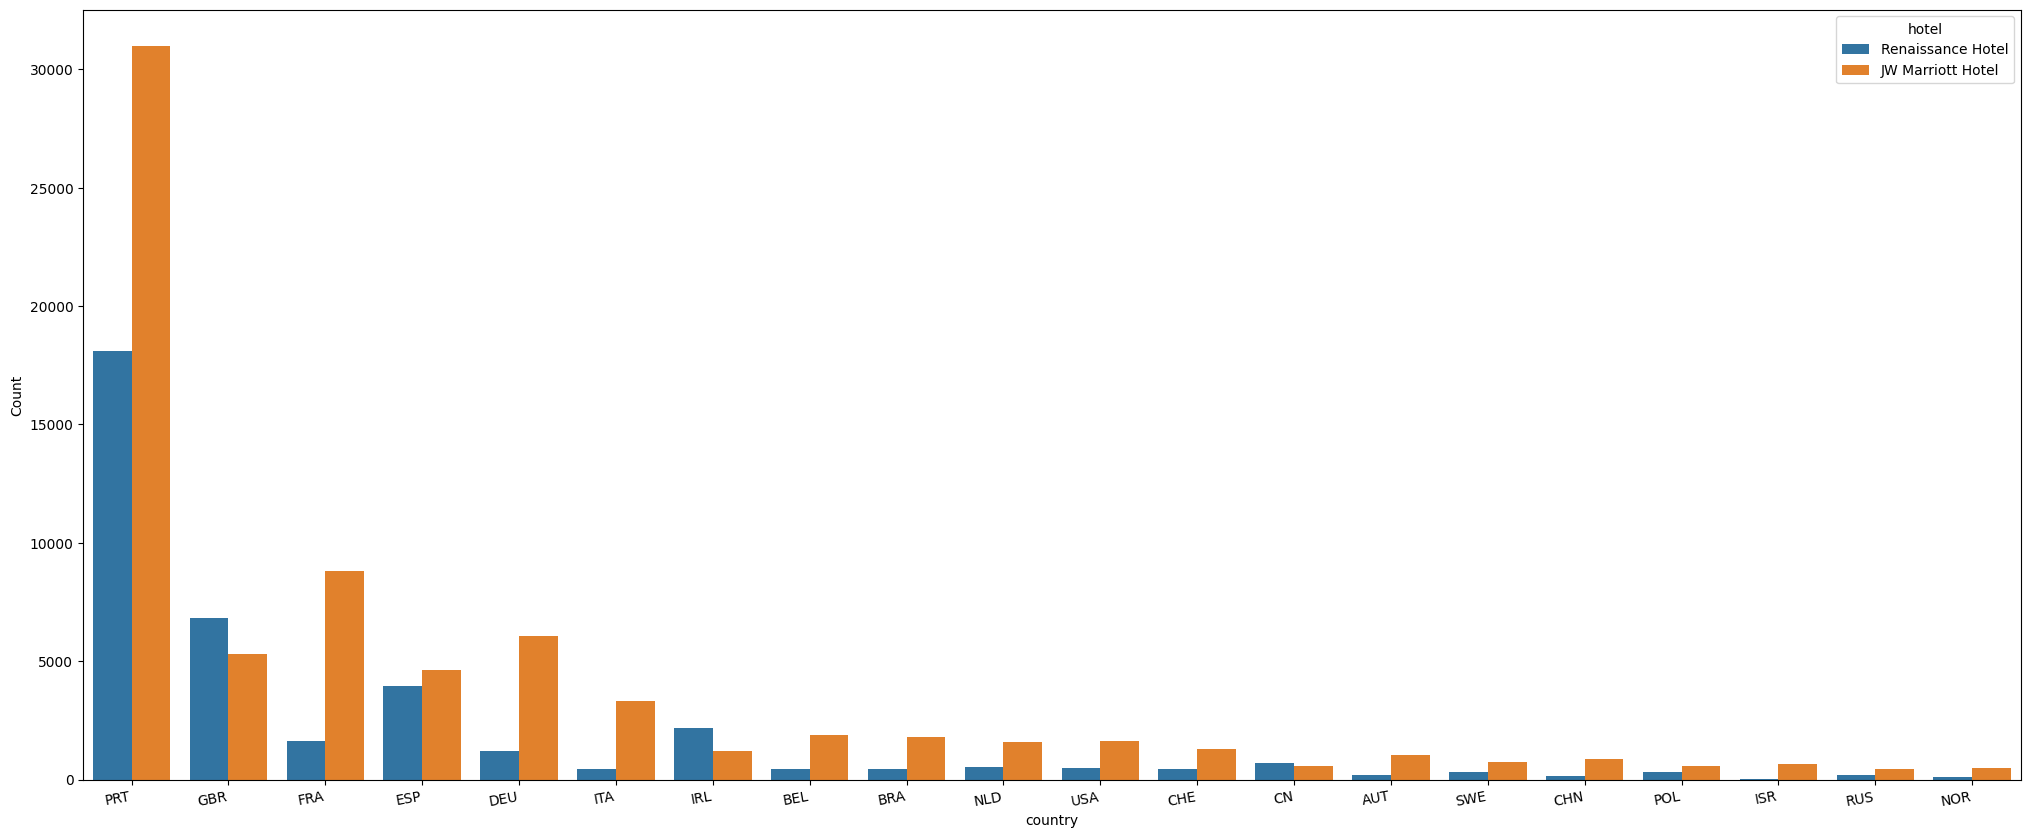

In [ ]:
topCountries = df['country'].value_counts().nlargest(20).index.tolist()
top20 = df[df['country'].isin(topCountries)]

plt.figure(figsize=(25, 10))
plt.tight_layout()
sns.countplot(data=top20, x="country", dodge=True, hue='hotel', order=topCountries)
plt.xticks(rotation=10, ha="right")
plt.ylabel("Count")
plt.show()


In [ ]:
renaissance = sdf.filter(sdf['hotel']=='Renaissance Hotel')
jw = sdf.filter(sdf['hotel']=='JW Marriott Hotel')

In [ ]:
sdf.groupby(['country'])\
.agg({"country": "count"})\
.sort("count(country)", ascending=False)\
.show(20)

+-------+--------------+
|country|count(country)|
+-------+--------------+
|    PRT|         49078|
|    GBR|         12129|
|    FRA|         10415|
|    ESP|          8568|
|    DEU|          7287|
|    ITA|          3766|
|    IRL|          3375|
|    BEL|          2342|
|    BRA|          2224|
|    NLD|          2104|
|    USA|          2097|
|    CHE|          1730|
|     CN|          1279|
|    AUT|          1263|
|    SWE|          1024|
|    CHN|           999|
|    POL|           919|
|    ISR|           669|
|    RUS|           632|
|    NOR|           607|
+-------+--------------+
only showing top 20 rows



**Promotion For Renaissance:** 
More offers for people who come from countries between 200 and 700.

1.   10% off the stay for people coming from these countries
2.   Add more cultural events, highlighting these countries traditions and culture.

In [ ]:
renaissance.groupby(['country'])\
.agg({"country": "count"})\
.sort("count(country)", ascending=False)\
.show(20)

+-------+--------------+
|country|count(country)|
+-------+--------------+
|    PRT|         18094|
|    GBR|          6814|
|    ESP|          3957|
|    IRL|          2166|
|    FRA|          1611|
|    DEU|          1203|
|     CN|           710|
|    NLD|           514|
|    USA|           479|
|    ITA|           459|
|    BEL|           448|
|    CHE|           435|
|    BRA|           430|
|    POL|           333|
|    SWE|           304|
|    AUT|           210|
|    RUS|           189|
|    ROU|           177|
|    FIN|           151|
|    CHN|           134|
+-------+--------------+
only showing top 20 rows



**Promotion for JW Marriott:** 
More offers for people who come from countries between 400 and 3K.


1.   10% off the stay for people coming from these countries
2.   Add more cultural events, highlighting these countries traditions and culture.

In [ ]:
jw.groupby(['country'])\
.agg({"country": "count"})\
.sort("count(country)", ascending=False)\
.show(20)

+-------+--------------+
|country|count(country)|
+-------+--------------+
|    PRT|         30984|
|    FRA|          8804|
|    DEU|          6084|
|    GBR|          5315|
|    ESP|          4611|
|    ITA|          3307|
|    BEL|          1894|
|    BRA|          1794|
|    USA|          1618|
|    NLD|          1590|
|    CHE|          1295|
|    IRL|          1209|
|    AUT|          1053|
|    CHN|           865|
|    SWE|           720|
|    ISR|           641|
|    POL|           586|
|     CN|           569|
|    NOR|           484|
|    RUS|           443|
+-------+--------------+
only showing top 20 rows



### Insight 4

**Promotion:** An extra bed for people with 2 children or babies

In [ ]:
children = sdf.groupBy('children','babies').count().show()
leh = spark.sql("""
   SELECT *
FROM hotels
WHERE (children + babies) = 2;
""")

leh.show()

+--------+------+------+
|children|babies| count|
+--------+------+------+
|     2.0|     0|  3620|
|     1.0|     1|   140|
|     0.0|    10|     1|
|    10.0|     0|     1|
|     0.0|     1|   728|
|     2.0|     1|    32|
|     1.0|     0|  4718|
|     0.0|     0|110058|
|     0.0|     2|    12|
|     3.0|     0|    76|
|     0.0|     9|     1|
|     1.0|     2|     3|
+--------+------+------+

+----------+-----------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+-------------+------+---------------------------+-------------------------+
|Unnamed: 0|            hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_

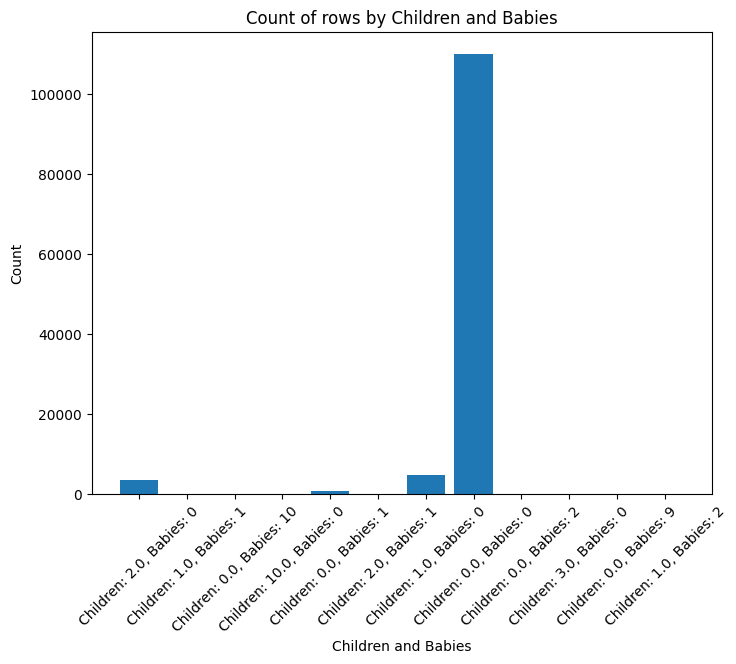

In [ ]:
count_data = sdf.groupBy('children', 'babies').count().toPandas()
plt.figure(figsize=(8, 6))
plt.bar(range(len(count_data)), count_data['count'])
x_labels = [f"Children: {c}, Babies: {b}" for c, b in zip(count_data['children'], count_data['babies'])]
plt.xticks(range(len(count_data)), x_labels, rotation=45)
plt.ylabel('Count')
plt.xlabel('Children and Babies')
plt.title('Count of rows by Children and Babies')
plt.show()

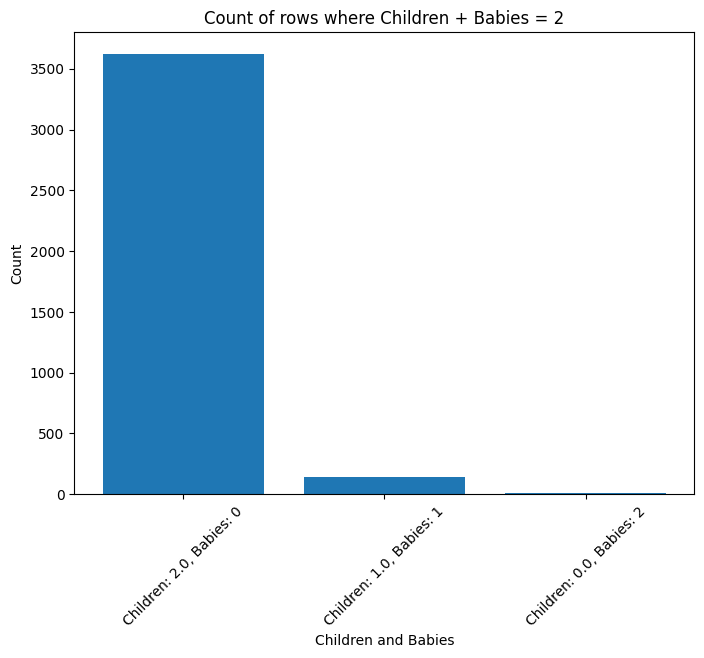

In [ ]:
countBabieschildren= leh.groupby(['children', 'babies']).count().toPandas()

plt.figure(figsize=(8, 6))
plt.bar(range(len(countBabieschildren)), countBabieschildren['count'])

x_labels = [f"Children: {c}, Babies: {b}" for c, b in zip(countBabieschildren['children'], countBabieschildren['babies'])]
plt.xticks(range(len(countBabieschildren)), x_labels, rotation=45)
plt.ylabel('Count')
plt.xlabel('Children and Babies')
plt.title('Count of rows where Children + Babies = 2')
plt.show()


In [ ]:
renaissance.groupby(['company'])\
.agg({"Unnamed: 0": "count"})\
.sort("count(Unnamed: 0)", ascending=False)\
.show(20)

+-------+-----------------+
|company|count(Unnamed: 0)|
+-------+-----------------+
|   40.0|            36955|
|  223.0|              784|
|  281.0|              138|
|  154.0|              133|
|  405.0|              100|
|   94.0|               87|
|  135.0|               64|
|  331.0|               58|
|  498.0|               58|
|   47.0|               56|
|  110.0|               51|
|   20.0|               50|
|  342.0|               48|
|  270.0|               43|
|  195.0|               38|
|  113.0|               36|
|  174.0|               36|
|  204.0|               34|
|  307.0|               34|
|  269.0|               33|
+-------+-----------------+
only showing top 20 rows



**PROMOTION:**
for Renaissance hotel we can observe that companies with ids:269,307,204,174,113,195,270 and 342 provide the least amount of bookings, thus we can give these companies special rates for week nights for example to test if this can help us get more bookings through these companies.

In [ ]:
jw.groupby(['company'])\
.agg({"Unnamed: 0": "count"})\
.sort("count(Unnamed: 0)", ascending=False)\
.show(20)

+-------+-----------------+
|company|count(Unnamed: 0)|
+-------+-----------------+
|   40.0|            76565|
|   67.0|              267|
|   45.0|              250|
|  153.0|              215|
|  219.0|              141|
|  233.0|              114|
|  174.0|              113|
|   51.0|               86|
|  242.0|               61|
|  348.0|               59|
|   38.0|               51|
|   91.0|               48|
|  280.0|               48|
|  197.0|               47|
|   68.0|               46|
|  218.0|               42|
|  169.0|               39|
|  202.0|               38|
|  238.0|               33|
|  148.0|               33|
+-------+-----------------+
only showing top 20 rows



**PROMOTION:**
for JW Marriot hotel we can observe that companies with ids:148,238,202,169,218,68,197 and 280 provide the least amount of bookings, thus we can give these companies special rates for week nights for example to test if this can help us get more bookings through these companies.Also we can think of doing more marketing to the customers of these companies.

In [ ]:
couples = spark.sql("""
   SELECT *
FROM hotels
WHERE adults = 2 ;
""")

couples.groupby(['hotel'])\
.agg({"Unnamed: 0": "count"})\
.sort("count(Unnamed: 0)", ascending=False)\
.show(20)

+-----------------+-----------------+
|            hotel|count(Unnamed: 0)|
+-----------------+-----------------+
|JW Marriott Hotel|            58255|
|Renaissance Hotel|            31425|
+-----------------+-----------------+



(Assumption: when adults=2 then we have a couple)
**PROMOTION for Renaissance**: Since we analyzed that the couples in JW Marriot are 58 255 in comparaison to 31 425 in Renaissance we can do a promotion that stated that couples who book at the renaissance can get an extra free night or a free couples massage. We do this in aim of gaining more couples customer in Renaissance.

## ML Models

In [ ]:

# Select relevant columns from the dataframe
df = sdf.select('hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'agent', 'company', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests')

# Create StringIndexers for the categorical columns
string_indexers = [StringIndexer(inputCol=col, outputCol=col+"_index", handleInvalid="skip") for col in ['hotel', 'arrival_date_month', 'meal', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type']]

# Create a VectorAssembler to combine features into a single vector column
feature_columns = ['hotel_index', 'lead_time', 'arrival_date_month_index', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal_index', 'distribution_channel_index', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type_index', 'assigned_room_type_index', 'booking_changes', 'deposit_type_index', 'agent', 'company', 'days_in_waiting_list', 'customer_type_index', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']
assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')

# Create a RandomForestClassifier model
rf_classifier = RandomForestClassifier(featuresCol='features', labelCol='is_canceled', seed=42)

# Create a pipeline to chain the stages together
pipeline = Pipeline(stages=string_indexers + [assembler, rf_classifier])

# Split the data into training and testing sets
train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)

# Fit the pipeline to the training data
model = pipeline.fit(train_data)

# Make predictions on the test data
predictions = model.transform(test_data)

# Evaluate the model using BinaryClassificationEvaluator with areaUnderROC metric
evaluator = BinaryClassificationEvaluator(labelCol='is_canceled', metricName='areaUnderROC')
accuracy = evaluator.evaluate(predictions)

print('Random Forest Classifier accuracy:',accuracy*100,"%")


Random Forest Classifier accuracy: 84.08058459748648 %


In [ ]:
df.columns
df.head()
df = df.select('hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'agent', 'company', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests')


categoricalColumns = ['hotel', 'arrival_date_month', 'meal', 'country', 'distribution_channel',
                       'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type']

stages = []

for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]
label_stringIdx = StringIndexer(inputCol = 'is_canceled', outputCol = 'label')
stages += [label_stringIdx]

numericCols = ['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month',
               'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies',
               'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled',
               'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr',
               'required_car_parking_spaces', 'total_of_special_requests']
assemblerInputs = numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]
cols = df.columns


featurizationPipeline = Pipeline(stages = [VectorAssembler(inputCols=numericCols, outputCol="feature_vector")])
featurizationPipelineModel = featurizationPipeline.fit(df)
df = featurizationPipelineModel.transform(df)



pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df)
df = pipelineModel.transform(df)
selectedCols = ['label', 'features'] + cols
df = df.select(selectedCols)
df.printSchema()

train, test = df.randomSplit([0.7, 0.3], seed = 2018)


root
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- hotel: string (nullable = true)
 |-- is_canceled: long (nullable = true)
 |-- lead_time: long (nullable = true)
 |-- arrival_date_year: long (nullable = true)
 |-- arrival_date_month: string (nullable = true)
 |-- arrival_date_week_number: long (nullable = true)
 |-- arrival_date_day_of_month: long (nullable = true)
 |-- stays_in_weekend_nights: long (nullable = true)
 |-- stays_in_week_nights: long (nullable = true)
 |-- adults: long (nullable = true)
 |-- children: double (nullable = true)
 |-- babies: long (nullable = true)
 |-- meal: string (nullable = true)
 |-- country: string (nullable = true)
 |-- distribution_channel: string (nullable = true)
 |-- is_repeated_guest: long (nullable = true)
 |-- previous_cancellations: long (nullable = true)
 |-- previous_bookings_not_canceled: long (nullable = true)
 |-- reserved_room_type: string (nullable = true)
 |-- assigned_room_type: string (nullable =

In [ ]:
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 20)
dtModel = dt.fit(train)
predictions = dtModel.transform(test)
predictions.select('hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'agent', 'company', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests').show(10)

+-----------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+---------------+------+---------------------------+-------------------------+
|            hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_list|  customer_type|   adr|required_car_parking_spaces|total_of_special_requests|
+-----------------+-----------+---

In [ ]:
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 20)
dtModel = dt.fit(train)
predictions = dtModel.transform(test)
predictions.head()
# predictions.select( 'label', 'rawPrediction', 'prediction', 'probability').show(10)


true_labels=predictions.select('label')
lr_predictions=predictions.select('prediction')

accuracy = accuracy_score(true_labels.toPandas(), lr_predictions.toPandas())
print("DecisionTreeClassifier Accuracy =",accuracy*100,"%")

DecisionTreeClassifier Accuracy = 82.0923076923077 %


In [ ]:

rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label',maxDepth=20)
rfModel = rf.fit(train)
predictions = rfModel.transform(test)
predictions.head()
predictions.select( 'label', 'rawPrediction', 'prediction', 'probability').show(10)


true_labels=predictions.select('label')
lr_predictions=predictions.select('prediction')

accuracy = accuracy_score(true_labels.toPandas(), lr_predictions.toPandas())
print("RandomForest Accuracy =",accuracy*100,"%")


+-----+--------------------+----------+--------------------+
|label|       rawPrediction|prediction|         probability|
+-----+--------------------+----------+--------------------+
|  0.0|[16.7724242424242...|       0.0|[0.83862121212121...|
|  0.0|[12.4654471544715...|       0.0|[0.62327235772357...|
|  0.0|[16.1189646135397...|       0.0|[0.80594823067698...|
|  0.0|[13.2272727272727...|       0.0|[0.66136363636363...|
|  0.0|[14.9274347499703...|       0.0|[0.74637173749851...|
|  0.0|      [14.875,5.125]|       0.0|   [0.74375,0.25625]|
|  0.0|[17.7853066288550...|       0.0|[0.88926533144275...|
|  0.0|[10.2453890823418...|       0.0|[0.51226945411709...|
|  0.0|[16.5900385534006...|       0.0|[0.82950192767003...|
|  0.0|[13.3235101506221...|       0.0|[0.66617550753110...|
+-----+--------------------+----------+--------------------+
only showing top 10 rows

RandomForest Accuracy = 84.76643356643356 %


In [ ]:
gbt = GBTClassifier(maxIter=200)
gbtModel = gbt.fit(train)
predictions = gbtModel.transform(test)
predictions.select( 'label', 'rawPrediction', 'prediction', 'probability').show(10)


true_labels=predictions.select('label')
lr_predictions=predictions.select('prediction')

accuracy = accuracy_score(true_labels.toPandas(), lr_predictions.toPandas())
print("GradientBoost Accuracy =",accuracy*100,"%")

+-----+--------------------+----------+--------------------+
|label|       rawPrediction|prediction|         probability|
+-----+--------------------+----------+--------------------+
|  0.0|[1.04192914386298...|       0.0|[0.88932436203379...|
|  0.0|[0.59573348350224...|       0.0|[0.76700332743983...|
|  0.0|[0.73761158398331...|       0.0|[0.81384998400904...|
|  0.0|[0.35411470008949...|       0.0|[0.67000980399856...|
|  0.0|[0.63775280119166...|       0.0|[0.78168375939115...|
|  0.0|[0.81312687129184...|       0.0|[0.83565579254503...|
|  0.0|[0.91746046563887...|       0.0|[0.86234690683694...|
|  0.0|[0.25196565720525...|       0.0|[0.6233827589306,...|
|  0.0|[0.53442552451085...|       0.0|[0.74437835572344...|
|  0.0|[0.55457444475629...|       0.0|[0.75197040408851...|
+-----+--------------------+----------+--------------------+
only showing top 10 rows

GradientBoost Accuracy = 81.28951048951049 %


In [ ]:
svm = LinearSVC(maxIter=200, regParam=0.2)
model = svm.fit(train)
predictions = model.transform(test)

evaluator = BinaryClassificationEvaluator(labelCol='is_canceled', metricName='areaUnderROC')
accuracy = evaluator.evaluate(predictions)

print("SVM Accuracy =",accuracy*100,"%")

SVM Accuracy = 76.2365263090037 %


In [ ]:
df.show()


+-----+--------------------+-----------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+-------------+------+---------------------------+-------------------------+
|label|            features|            hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_list|customer_type|   adr|required_car_parking_spaces|total_of_sp

In [ ]:
splits = df.randomSplit([0.8, 0.2], seed=2018)
train = splits[0]
test = splits[1]

train_selected = train.select("features", "label")
test_selected = test.select("features", "label")

layers = [len(train_selected.select('features').first()[0]), 14, 4, 2]

mlp = MultilayerPerceptronClassifier(layers=layers, blockSize=16, seed=1234)

model = mlp.fit(train_selected)

result = model.transform(test_selected)
prediction = result.select("prediction")
true_labels=result.select("label")

evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
# accuracy = evaluator.evaluate(predictionAndLabels)
# print("Multilayer Perceptron Classifier accuracy = " + str(accuracy*100)+' %')

accuracy = accuracy_score(true_labels.toPandas(), prediction.toPandas())
print("Multiple Layer Perceptron Accuracy =",accuracy*100,"%")

Multiple Layer Perceptron Accuracy = 67.1166624610985 %


Links:

https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.classification.MultilayerPerceptronClassifier.html

https://towardsdatascience.com/machine-learning-with-pyspark-and-mllib-solving-a-binary-classification-problem-96396065d2aa